In [18]:
# import the necessary packages
from PIL import Image
#import pytesseract
import argparse
import cv2
import os

from skimage.data import load
from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)

from skimage.morphology import erosion, closing
from skimage.morphology import disk


%matplotlib inline 
# to display directly in the notebook

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15.0, 15.0]
plt.rcParams['image.cmap'] = 'gray' 

In [19]:
def save(image, name='', method='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/pictures_processed'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    
    name = name.split('/')[-1]
    
    # Saving the image
    new_path = '{}.{}'.format(name.split('.')[0] + '_' + method, fmt)
    cv2.imwrite(new_path, image)
    
    os.chdir(pwd)
    
    return iPath +'/'+ new_path

In [20]:
def Bin_Bredley (path, d=100, t=0.15) :
    
    image = cv2.imread(path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('float')
    
    n, m = np.shape(image_gray)
    s2 = (int) (n*1.0 / (d*2))
    
    if not s2 :
        s2 = 1        
    
    integral_image = cv2.integral(image_gray)[1:,1:]
    
    result = np.zeros(np.shape(image_gray))
    T = np.zeros(np.shape(image_gray))
    
    winarea = 4*s2*s2 

    cond_bin = integral_image[2*s2 :, 2*s2 :] - integral_image[2*s2 :, :-2*s2] - \
                integral_image[:-2*s2, 2*s2 :] + integral_image[:-2*s2,:-2*s2]
    
    T[s2:-s2,s2:-s2] = cond_bin
    
    T *= (1.0-t)*1.0 / winarea 
    
    result = np.maximum(result, np.sign(image_gray - T))*255
    
    # Saving the image
    new_path = save(result, path, 'Bredley')
    
    return new_path

def Bin_Niblack(path, num=0):
    window_size = 25
    
    image = cv2.imread(path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('float')
    
    thresh_niblack = threshold_niblack(image_gray, window_size=window_size, k=0.8)
    binary_niblack = image_gray > thresh_niblack
    
    # Saving the image
    new_path = save(255*binary_niblack.astype(int), path, 'Niblack')
    
    return new_path

def Bin_Sauvola(path, num=0):
    
    window_size = 35
    k=0.1
    
    image = cv2.imread(path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('float')
    thresh_sauvola = threshold_sauvola(image_gray,window_size=window_size, k=k, r=15)
    binary_sauvola = image_gray > thresh_sauvola
    
    # Saving the image
    new_path = save(255*binary_sauvola.astype(float), path, 'Sauvola')
    
    return new_path

In [21]:
def Luminosity(path, num=0):

    image = cv2.imread(path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('float')

    count = 30

    illumination = img_gray.copy()

    for i in range(0, count):

        image_1 = illumination[:-2,2:] + illumination[2:,:-2]
        image_2 = illumination[:-2,1:-1] + illumination[2:,1:-1]
        image_3 = illumination[1:-1,2:] + illumination[1:-1,:-2]
        image_4 = illumination[2:,2:] + illumination[:-2,:-2]

        illumination[1:-1, 1:-1] = 0.5*np.maximum (np.maximum (np.maximum (image_1, image_2), image_3), image_4)

    result = 255 - abs(img_gray - illumination)
    
    # Saving the image
    new_path = save(result, path, 'lumin')
    
    return new_path


In [22]:
def Morph (path, rad=6):
    
    # Downloading the image as greyscale
    image = cv2.imread(path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype('float')
    
    '''
    # Applying CLAHE
    equ = cv2.equalizeHist(I)
    # Creating the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    # Applying dilatation
    marker = cv2.erode(equ, kernel)
    dilatation = cv2.dilate(marker, kernel, iterations=1)
    '''
    selem = disk(rad)
    eroded = erosion(img_gray, selem)
    closed = closing(eroded, selem)
    
    
    # Saving the image
    new_path = save(closed, path, 'morph')
    return new_path

In [33]:
def Moyenne (images, path, t = 0):
    n = len(images)
    
    moyennne_im = np.zeros(images[0].shape)
    
    for i in images:
        moyennne_im += np.sign(i)
    
    
    
    #result = 255*moyennne_im/n
    
    res = (moyennne_im/n).astype(np.uint8)
    
    result = cv2.medianBlur(res,5)
    
    # Saving the image
    new_path = save(255*result, path, 'Moyenne')

    return(new_path)        

In [55]:
def figures_result (path):
    
    #Bin_Bredley Bin_Niblack Bin_Sauvola Luminosity Morph Moyenne
    
    #plt.rcParams['image.cmap'] = 'gray' 
    
    
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype('float')
    n, m = np.shape(img_gray)
    
    plt.rcParams['figure.figsize'] = [15.0, 15.0*(n*1.0/m)+1.0]
    
    '''img_m_0 = cv2.imread(Bin_Bredley(path))
    img_m_1 = cv2.imread(Bin_Niblack(path))
    img_m_2 = cv2.imread(Bin_Sauvola(path))
    img_m_3 = cv2.imread(Luminosity(path))
    img_m_4 = cv2.imread(Morph(path))'''
    
    img_m_0 = cv2.imread(Bin_Bredley(Morph(path)))
    img_m_1 = cv2.imread(Bin_Niblack(Morph(path)))
    img_m_2 = cv2.imread(Bin_Sauvola(Morph(path)))
    img_m_3 = cv2.imread(Luminosity(Morph(path)))
    img_m_4 = cv2.imread(Morph(path))
    
    titles = ['Original', 'Bin_Bredley', 'Bin_Niblack', 'Bin_Sauvola', 'Luminosity', 'Morp', 'Moyenne']
    
    images = [img, img_m_0, img_m_1, img_m_2, img_m_3, img_m_4]
    
    images_proc = [img_m_0, img_m_3, img_m_4]
    
    img_images = cv2.imread(Moyenne(images_proc, path))
    
    images.append(img_images)
    
    plt.figure()
    
    for i in range(7):
        plt.subplot(4,2,i+1),
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
        
    plt.show()
    
    #return images

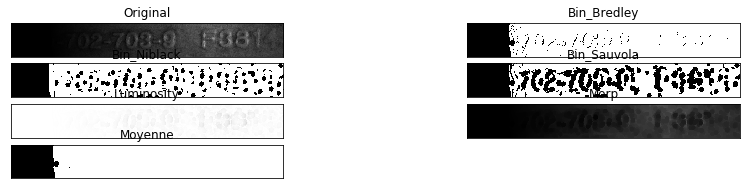

In [56]:
figures_result ('ressources/Premier Set Halo/im_randomized_1.png')

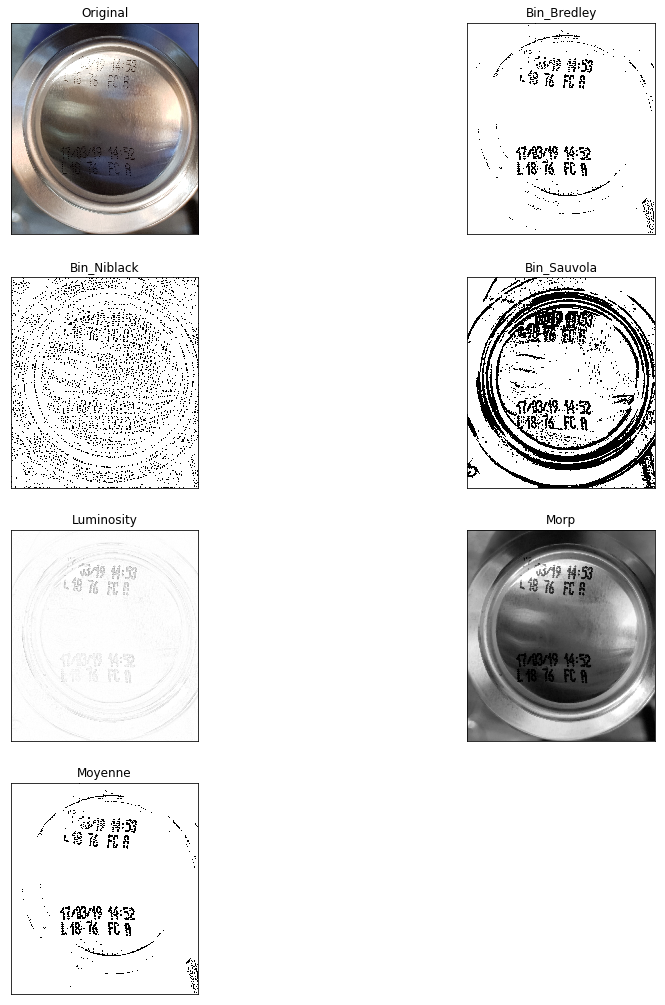

In [57]:
figures_result ('ressources/111_1.jpg')

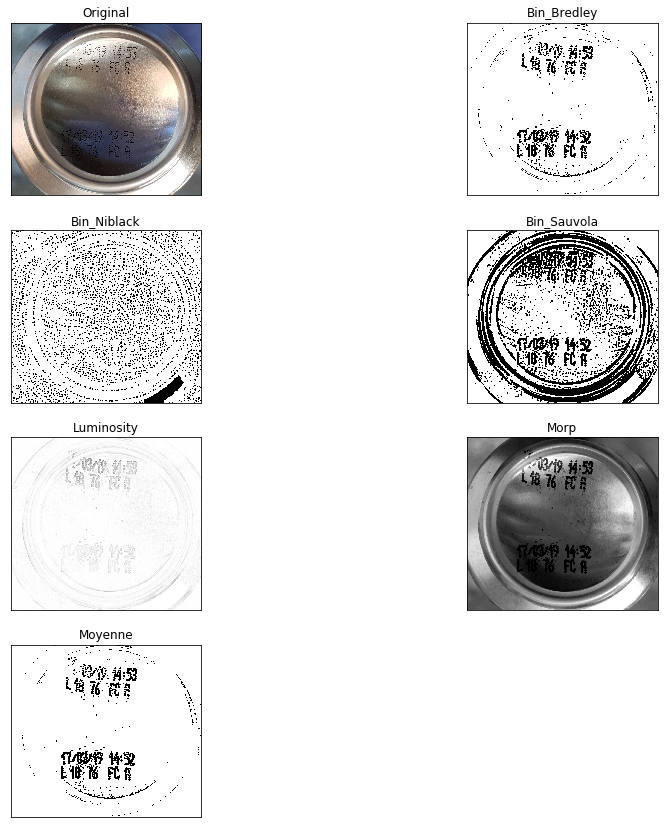

In [58]:
figures_result ('ressources/111_2.jpg')

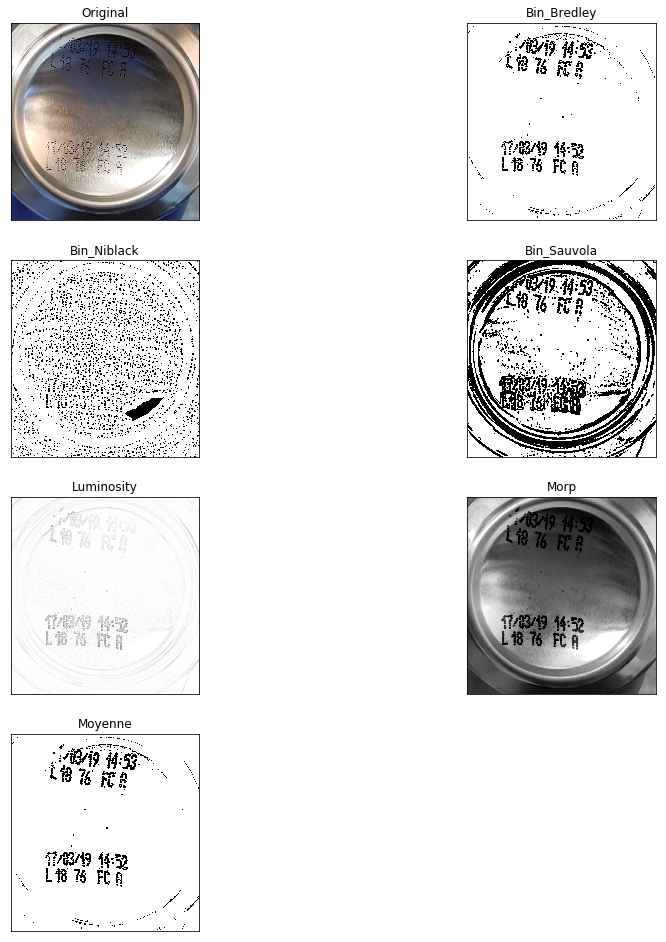

In [59]:
figures_result ('ressources/111_3.jpg')

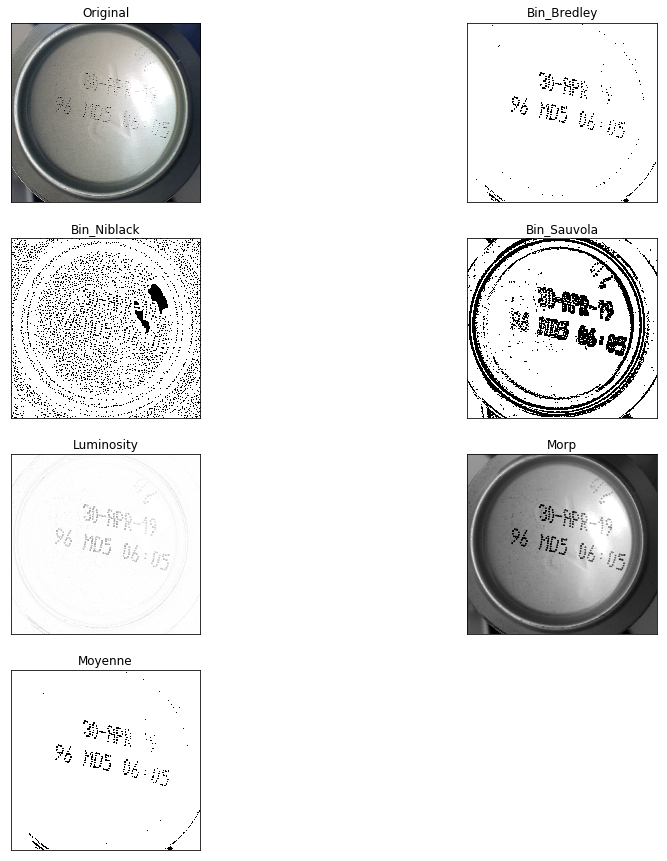

In [60]:
figures_result ('ressources/111_4.jpg')

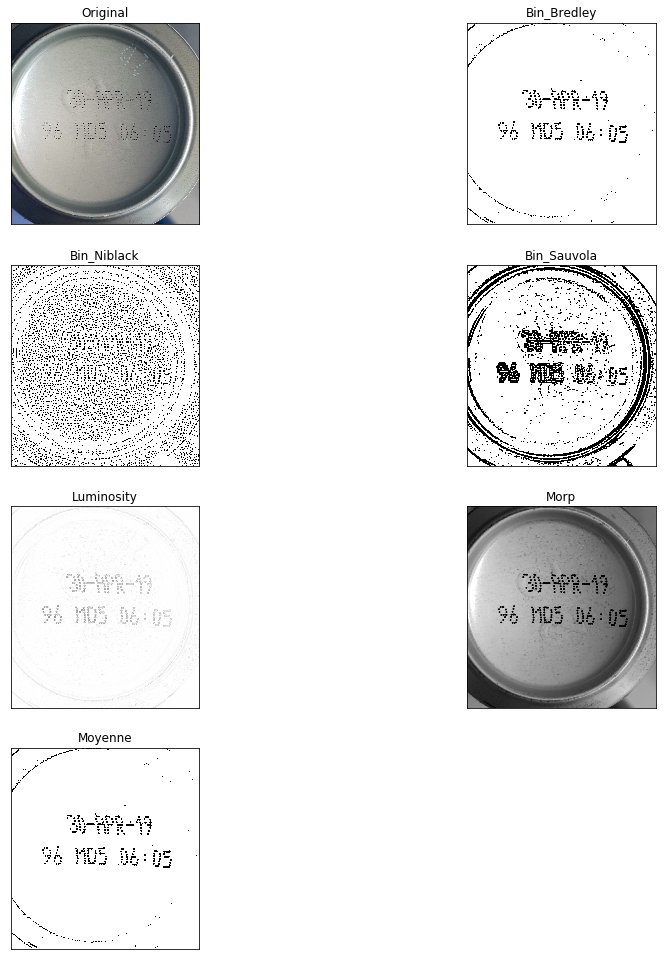

In [61]:
figures_result ('ressources/111_5.jpg')

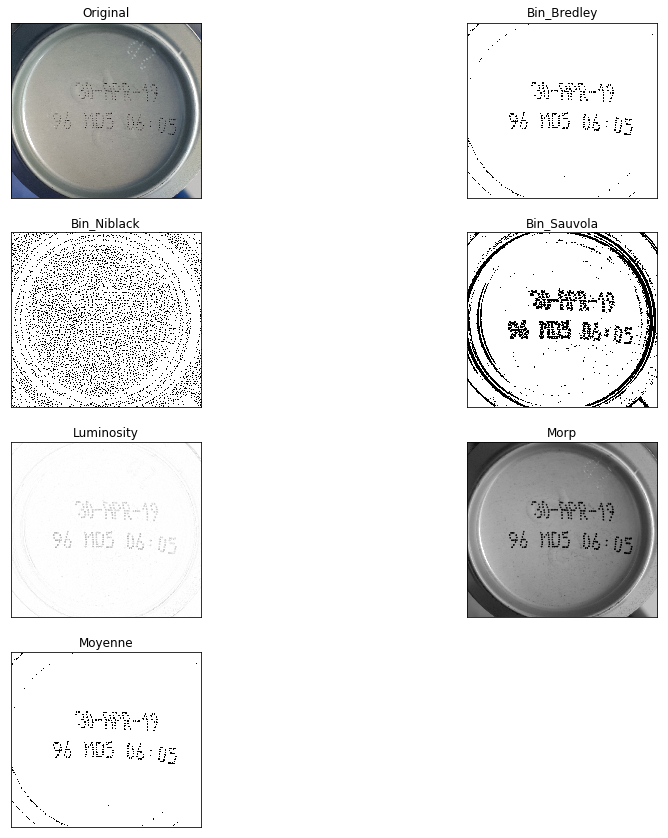

In [62]:
figures_result ('ressources/111_6.jpg')

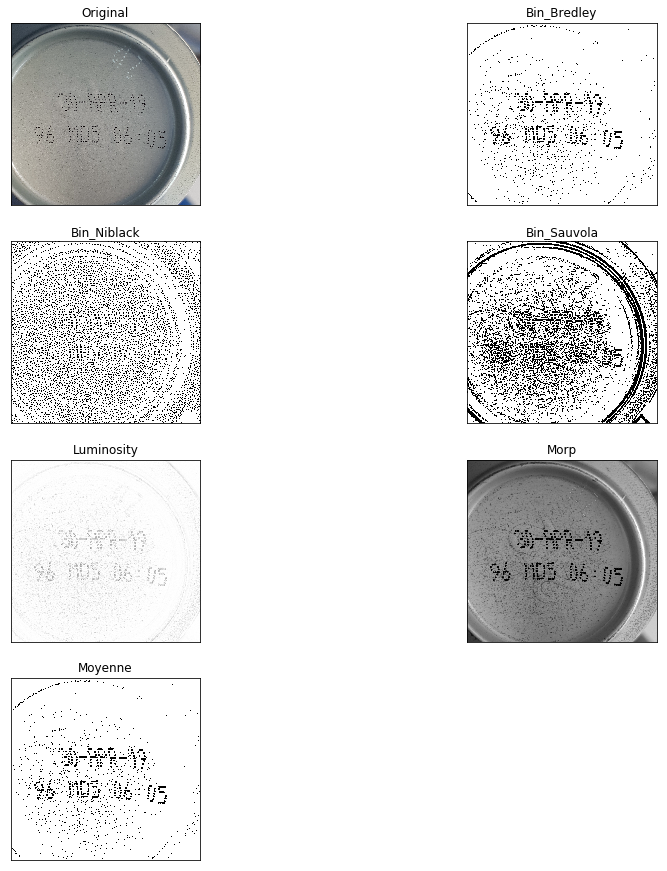

In [63]:
figures_result ('ressources/111_7.jpg')

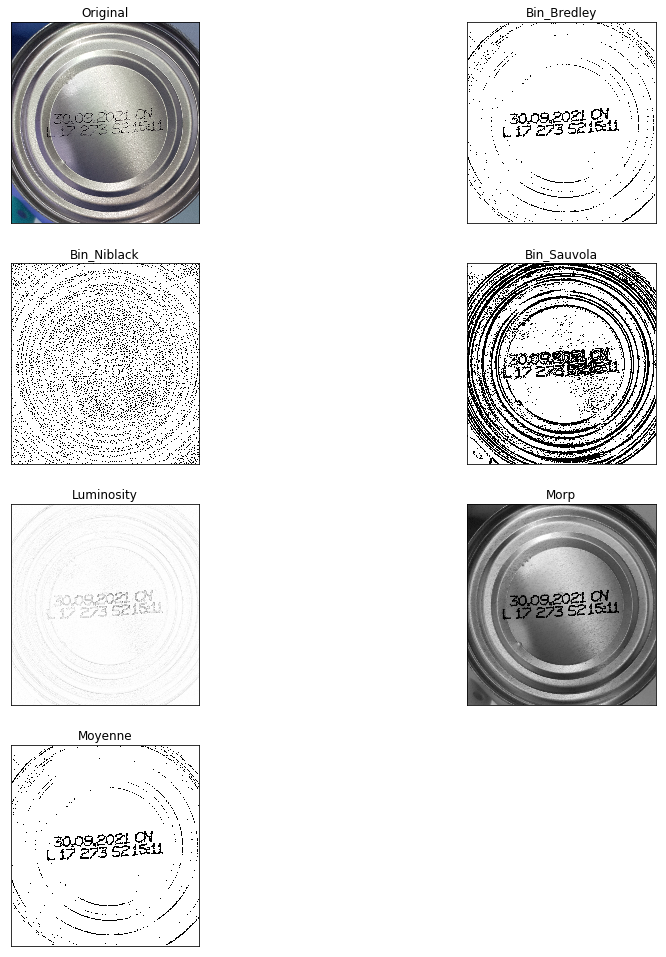

In [64]:
figures_result ('ressources/111_8.jpg')

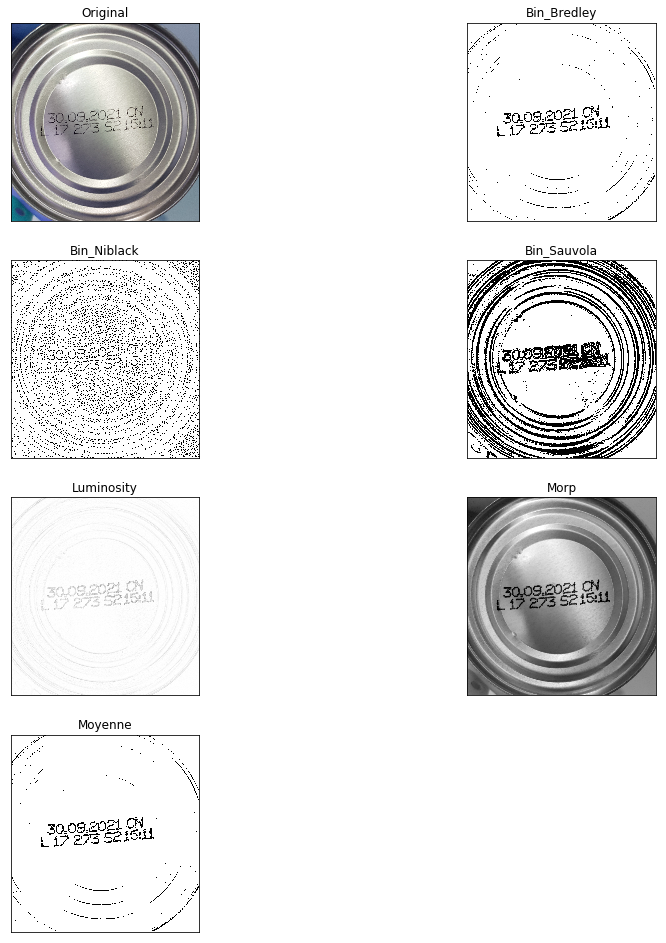

In [65]:
figures_result ('ressources/111_9.jpg')